In [6]:
from transformers import MBartForConditionalGeneration, AutoTokenizer
import numpy as np

# Load model and tokenizer
model_name = "minhbui/spell_correction"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = MBartForConditionalGeneration.from_pretrained(model_name)




/opt/anaconda3/lib/python3.11/site-packages/transformers/generation/utils.py:1168: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Generated Text: Hôm nay trời đẹp thật.
target tokens ['</s>', '<s>', '▁Hôm', '▁nay', '▁trời', '▁đẹp', '▁thật', '▁', '.', '</s>']
Alignment Mapping (Target Index -> Source Index):
Target token '</s>' (index 0) aligns with source token '</s>' (index 9)
Target token '<s>' (index 1) aligns with source token '</s>' (index 9)
Target token '▁Hôm' (index 2) aligns with source token '<s>' (index 0)
Target token '▁nay' (index 3) aligns with source token '</s>' (index 9)
Target token '▁trời' (index 4) aligns with source token '<s>' (index 0)
Target token '▁đẹp' (index 5) aligns with source token '</s>' (index 9)
Target token '▁thật' (index 6) aligns with source token '</s>' (index 9)
Target token '▁' (index 7) aligns with source token '<s>' (index 0)
Target token '.' (index 8) aligns with source token '<s>' (index 0)
Target token '</s>' (index 9) aligns with source token '</s>' (index 9)
Target token '<PAD>' (index 10) aligns with source token '<s>' (index 0)
Target token '<PAD>' (index 11) align

In [21]:
# Input sentence
source_sentence = "Hoom nay trời đẹp thật ."

# Tokenize and encode
source_ids = tokenizer(source_sentence, return_tensors='pt').input_ids

# Generate output with attention weights
outputs = model.generate(source_ids, output_attentions=True, return_dict_in_generate=True)
generated_tokens = outputs.sequences
attention_weights = outputs.cross_attentions[0]

# Decode generated tokens
generated_text = tokenizer.decode(generated_tokens[0], skip_special_tokens=True)
print("Generated Text:", generated_text)

# Tokenize source and target sentences
source_tokens = tokenizer.convert_ids_to_tokens(source_ids[0])
target_tokens = tokenizer.convert_ids_to_tokens(generated_tokens[0])

# Convert attention weights to numpy array
attention_weights = attention_weights[-1].squeeze().detach().numpy()

# Create alignment mapping
# alignment = {}
# for tgt_idx, attn_weights in enumerate(attention_weights):
#     src_idx = np.argmax(attn_weights)
#     alignment[tgt_idx] = src_idx

alignment = {}
for tgt_idx, attn_weights in enumerate(attention_weights):
    sorted_indices = np.argsort(attn_weights)  # Sort attention weights
    print(sorted_indices)
    second_highest_idx = sorted_indices[-1]  # Get the index of the second highest value
    alignment[tgt_idx] = second_highest_idx
    
print("target tokens", target_tokens)
print("alignment", alignment)

# Print alignment mapping
print("Alignment Mapping (Target Index -> Source Index):")
for tgt_idx, src_idx in alignment.items():
    src_word = source_tokens[src_idx] if src_idx < len(source_tokens) else "<PAD>"
    tgt_word = target_tokens[tgt_idx] if tgt_idx < len(target_tokens) else "<PAD>"
    print(f"Target token '{tgt_word}' (index {tgt_idx}) aligns with source token '{src_word}' (index {src_idx})")

/opt/anaconda3/lib/python3.11/site-packages/transformers/generation/utils.py:1168: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Generated Text: Hôm nay trời đẹp thật.
[7 3 5 6 8 4 1 2 0 9]
[6 7 5 2 1 4 3 8 0 9]
[7 6 5 4 3 2 1 8 0 9]
[6 7 5 8 4 3 1 0 2 9]
[6 5 7 4 8 3 1 2 0 9]
[7 6 8 5 4 2 3 1 0 9]
[6 5 7 4 8 1 3 0 9 2]
[5 3 4 8 7 6 1 9 2 0]
[3 6 4 7 5 8 1 2 9 0]
[7 6 3 4 5 8 1 0 9 2]
[3 5 4 6 8 7 0 1 2 9]
[7 3 4 6 5 8 1 2 0 9]
[5 3 6 4 8 0 2 7 1 9]
[5 3 1 2 6 4 8 0 7 9]
[4 5 6 7 3 1 0 8 2 9]
[6 7 8 5 3 4 1 2 9 0]
target tokens ['</s>', '<s>', '▁Hôm', '▁nay', '▁trời', '▁đẹp', '▁thật', '▁', '.', '</s>']
alignment {0: 9, 1: 9, 2: 9, 3: 9, 4: 9, 5: 9, 6: 2, 7: 0, 8: 0, 9: 2, 10: 9, 11: 9, 12: 9, 13: 9, 14: 9, 15: 0}
Alignment Mapping (Target Index -> Source Index):
Target token '</s>' (index 0) aligns with source token '</s>' (index 9)
Target token '<s>' (index 1) aligns with source token '</s>' (index 9)
Target token '▁Hôm' (index 2) aligns with source token '</s>' (index 9)
Target token '▁nay' (index 3) aligns with source token '</s>' (index 9)
Target token '▁trời' (index 4) aligns with source token '</s>' (index

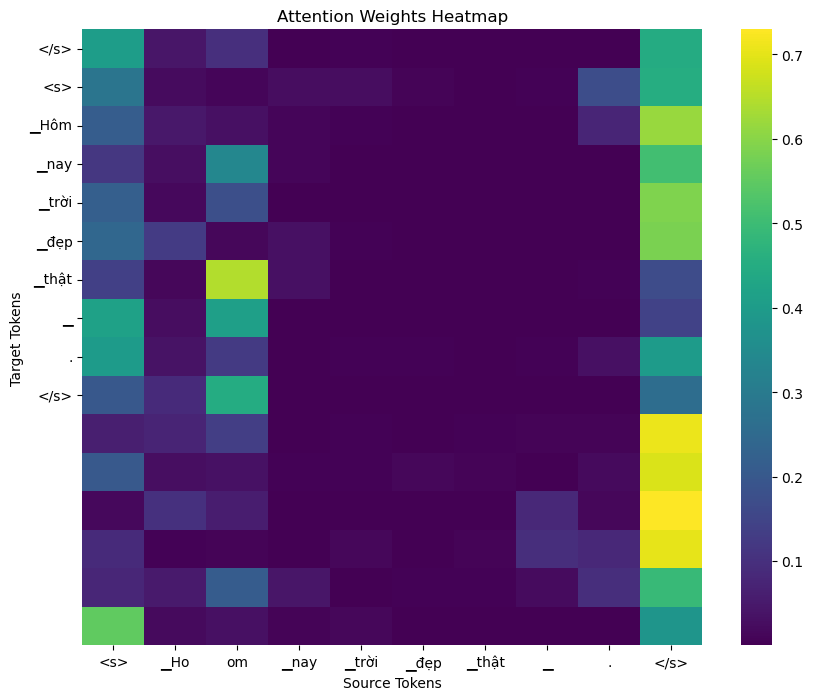

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the attention weights
plt.figure(figsize=(10, 8))
sns.heatmap(attention_weights, xticklabels=source_tokens, yticklabels=target_tokens, cmap='viridis')
plt.xlabel('Source Tokens')
plt.ylabel('Target Tokens')
plt.title('Attention Weights Heatmap')
plt.show()

In [28]:
import string
from utils import *

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [29]:
i = "Hôm nay trời thật dep... Đi chơi, không?"

separate_punctuation_with_space(norm_text(i.lower())).strip()

'hôm nay trời thật dep . . . đi chơi , không ?'

In [32]:
def reverse(text):
    res = []
    mapping = {}
    cnt = 0
    for idx, i in enumerate(text.split(' ')):
        out = separate_punctuation_with_space(norm_text(i.lower())).strip()
        res.append(out)
        for j in out.split(' '):
            mapping[cnt] = idx
            cnt += 1
    return mapping, " ".join(res)
        
        

In [33]:
reverse(i)

({0: 0,
  1: 1,
  2: 2,
  3: 3,
  4: 4,
  5: 4,
  6: 4,
  7: 4,
  8: 5,
  9: 6,
  10: 6,
  11: 7,
  12: 7},
 'hôm nay trời thật dep . . . đi chơi , không ?')